In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import copy
from os import path

import matplotlib.pyplot as plt

def show_train_history(la,lb,lc,ld):
    plt.figure(figsize=(15,4.8))
    plt.plot(la)
    plt.plot(lb)
    plt.plot(lc)
    plt.plot(ld)
    plt.title('2048 Training Score Trend with Simple Moving Average(window = 100)')
    plt.ylabel('points')
    plt.xlabel('epochs')
    plt.legend(['no conv layer','1 conv layer','2 conv layer','3 conv layer'], loc='upper left')
    plt.show()

def show_train_history_one(la,title):
    plt.figure(figsize=(15,4.8))
    plt.plot(la)
    plt.title('Time & loss')
    plt.ylabel('loss')
    plt.legend([title], loc='lower left')
    plt.show()

def moving_average(data, window_size):
    # 將輸入數據轉換為 numpy array
    data = np.array(data)
    
    # 使用 numpy 的 convolve 函數計算移動平均
    weights = np.ones(window_size) / window_size
    moving_avg = np.convolve(data, weights, mode='valid')

    pad_size = window_size - 1
    # 在開頭和結尾填充 NaN 或其他值（這裡用 NaN）
    pad_width = (pad_size // 2, pad_size - pad_size // 2)
    moving_avg = np.pad(moving_avg, pad_width, mode='constant', constant_values=np.nan)
                        
    return moving_avg

if path.exists('datalist zero conv.pkl')==1:
    with open('datalist zero conv.pkl', 'rb') as file:  # 'rb' 代表讀取二進位檔案
        loaded_data_0 = pickle.load(file)
        point_record_0 = loaded_data_0[3]
        
if path.exists('datalist one conv.pkl')==1:
    with open('datalist one conv.pkl', 'rb') as file:  # 'rb' 代表讀取二進位檔案
        loaded_data_1 = pickle.load(file)
        point_record_1 = loaded_data_1[3]

if path.exists('datalist two conv.pkl')==1:
    with open('datalist two conv.pkl', 'rb') as file:  # 'rb' 代表讀取二進位檔案
        loaded_data_2 = pickle.load(file)
        point_record_2 = loaded_data_2[3]

if path.exists('datalist three conv.pkl')==1:
    with open('datalist three conv.pkl', 'rb') as file:  # 'rb' 代表讀取二進位檔案
        loaded_data_3 = pickle.load(file)
        point_record_3 = loaded_data_3[3]


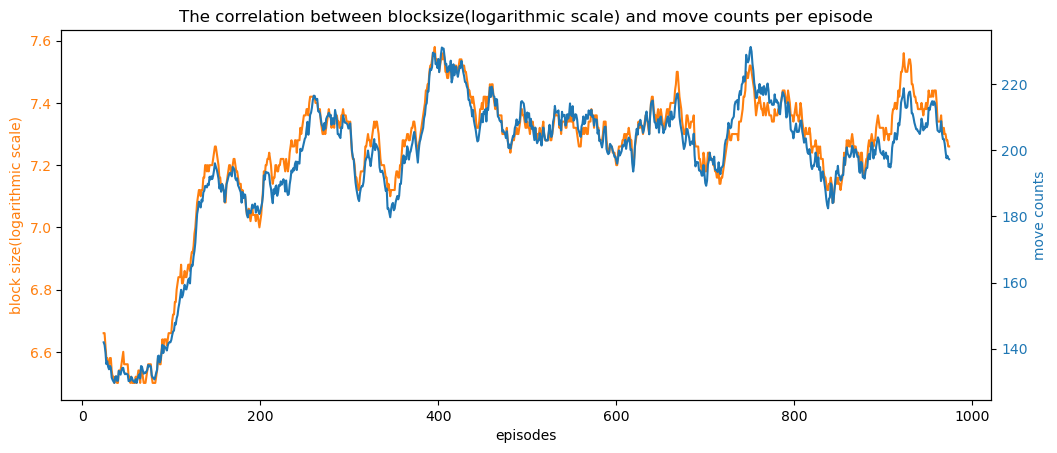

In [17]:
# Create some mock data
t = np.arange(0,1000,1)
data1 = moving_average([np.log2(t[1]) for t in point_record_2],50)
data2 = moving_average([t[2] for t in point_record_2],50)

fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('episodes')
ax1.set_ylabel('block size(logarithmic scale)', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('move counts', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.set_size_inches(12,4.8)
plt.title("The correlation between blocksize(logarithmic scale) and move counts per episode")
plt.show()

In [ ]:
fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)

data1 = moving_average([np.log2(t[1]) for t in point_record_2],50)
data2 = moving_average([t[2] for t in point_record_2],50)
data3 = moving_average([t[0] for t in point_record_2],50)

twin1 = ax.twinx()
twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin2.spines['right'].set_position(("axes", 1.08))
p1, = ax.plot(t, data1, "r-", label="block size(logarithmic scale)")
p2, = twin1.plot(t, data2, "g-", label="move counts")
p3, = twin2.plot(t, data3, "b-", label="points")

ax.set_xlabel("Episodes")

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
fig.set_size_inches(15,4.8)
ax.tick_params(axis='x', **tkw)

ax.legend(handles=[p1, p2, p3])

plt.show()

In [ ]:
import pandas as pd 
from collections import Counter

dataframe2 = pd.DataFrame([t[1] for t in point_record_2])

count_class = Counter(dataframe2[0])
df3=pd.DataFrame.from_dict(count_class,orient='index',columns=["Count"])
df3["Possibility"] = df3["Count"]/1000
df3.sort_index()
# 顯示結果
df3

In [ ]:
show_train_history(moving_average([t[0] for t in point_record_0],100),
                   moving_average([t[0] for t in point_record_1],100),
                   moving_average([t[0] for t in point_record_2],100),
                   moving_average([t[0] for t in point_record_3],100))

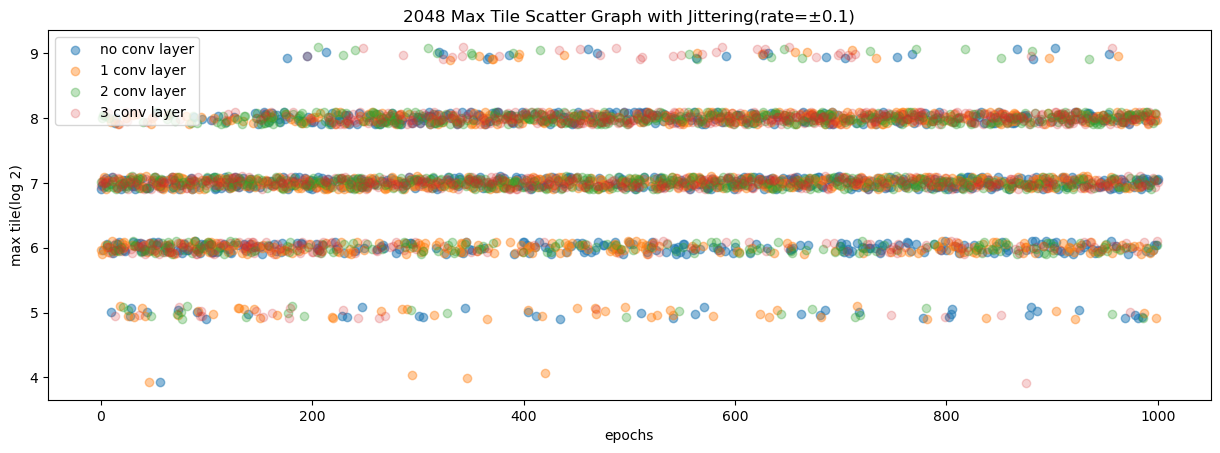

In [52]:
def show_train_history_dot(la,lb,lc,ld):
    plt.figure(figsize=(15,4.8))
    plt.scatter(range(0,1001),la,alpha=0.5)
    plt.scatter(range(0,1000),lb,alpha=0.4)
    plt.scatter(range(0,1000),lc,alpha=0.3)
    plt.scatter(range(0,1001),ld,alpha=0.2)
    plt.title('2048 Max Tile Scatter Graph with Jittering(rate=±0.1)')
    plt.ylabel('max tile(log 2)')
    plt.xlabel('epochs')
    plt.legend(['no conv layer','1 conv layer','2 conv layer','3 conv layer'], loc='upper left')
    plt.show()

show_train_history_dot([np.log2(t[1])+np.random.uniform(-0.1, 0.1) for t in point_record_0],
                       [np.log2(t[1])+np.random.uniform(-0.1, 0.1) for t in point_record_1],
                       [np.log2(t[1])+np.random.uniform(-0.1, 0.1) for t in point_record_2],
                       [np.log2(t[1])+np.random.uniform(-0.1, 0.1) for t in point_record_3])

In [44]:
len([np.log2(t[1]+ np.random.uniform(-0.1, 0.1, size=len(point_record_0))) for t in point_record_0])

1001